<a href="https://colab.research.google.com/github/Shibu778/Chaos-Tutorial/blob/master/Mean_Std_Abnormality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mean and standard deviation analysis of Rawat Sumit (06.08.2019) data (three channels of brain)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Functions
def txt_to_arr(filepath_in):
  '''
  Use the following file format
  filepath = '/content/drive/My Drive/Sleep data/Amit Agrahari/C3 - 14.04.2014.txt'
  txt_to_mat(filepath)
  '''
  df = pd.read_csv(filepath_in,header=None,encoding= 'unicode_escape')
  df = df[6:]
  arr = np.squeeze(df.to_numpy(),axis = 1)
  arr = arr.astype(float)
  print("Length of data : ", len(arr))
  return arr

def give_abinf(seg1):
  seg1 = seg1-seg1.min()
  mn = seg1.mean()
  std = seg1.std()
  seg1_mod = [0 if seg > (mn-std) and seg < (mn+std) else seg for seg in seg1]
  all_seg = []
  i = 0
  while (i != (len(seg1)-1)):
    seg = []
    seg_i = []
    j = i
    while (seg1_mod[i]!=0):
      seg.append(seg1_mod[i])
      seg_i.append(i)
      i = i+1
    if j == i:
      i = i+1
    if seg_i != []:
      seg_i = np.asarray(seg_i, dtype = 'float64')
      seg = np.asarray(seg, dtype = 'float64')
      all_seg1 = [seg,seg_i, seg_i.mean(),seg.max()]
      all_seg.append(all_seg1)
  plt.figure(1)
  plt.plot(seg1)
  plt.figure(2)
  plt.plot(seg1_mod)
  plt.show()
  return all_seg

def extract_ab_features(all_seg):
  ab_feat = []
  for i in range(len(all_seg)):
    feat = []
    feat.append(all_seg[i][2])
    feat.append(len(all_seg[i][1]))
    feat.append(all_seg[i][3])
    ab_feat.append(feat)

  return ab_feat

In [ ]:
# Mount the drive
# Upload the following files in My Drive folder - C3 - 06.08.2019.txt,F3 - 06.08.2019.txt,O2 - 06.08.2019.txt
# If the files are in other folder define the path as follows and create a path variable
path = 'drive/My Drive/Sleep data/Rawat Sumit - 06.08.2019/'
filepath =path + 'C3 - 06.08.2019.txt'
data = txt_to_arr(filepath)
data = data[10000:20000]
filepath1 = path + 'F3 - 06.08.2019.txt'
data1 = txt_to_arr(filepath1)
data1 = data1[10000:20000]
filepath2 = path + 'O2 - 06.08.2019.txt'
data2 = txt_to_arr(filepath2)
data2 = data2[10000:20000]

filepath3 = path + 'ECG - 06.08.2019.txt'
data3 = txt_to_arr(filepath3)
data3 = data3[20000:40000]

# Data taken is the 10000 to 20000 points from each channel as data, data1 and data2
# In below code 0 or no number after a variable will mean the C3 data, 1 will mean the F3 data and 2 will mean the O2 data, 3 means ECG data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Length of data :  4619072
Length of data :  4619072
Length of data :  4619072
Length of data :  9238144


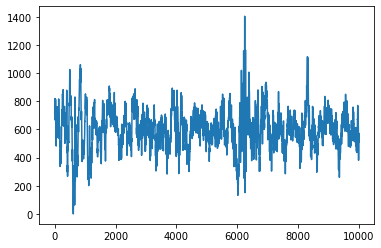

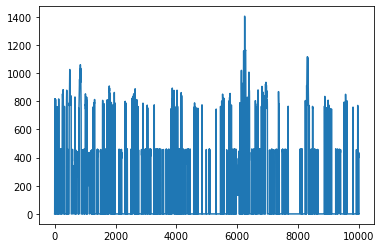

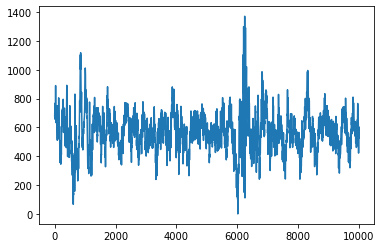

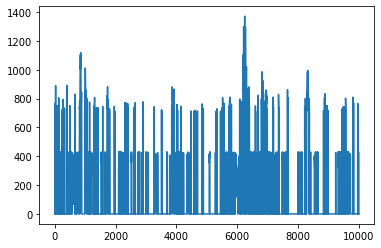

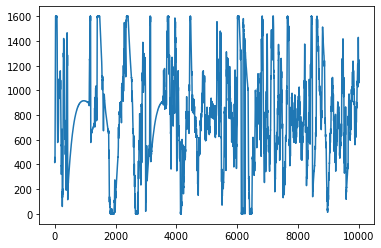

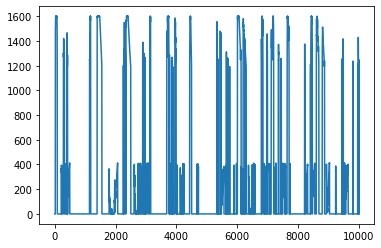

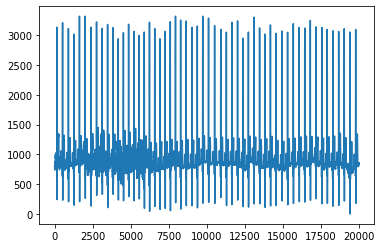

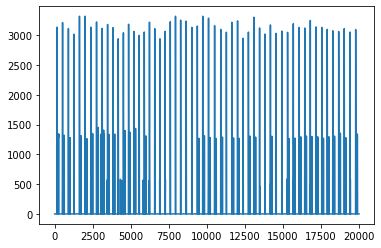

In [ ]:
# Finding out the information about abnormalities in three of the data
# Plotting the data after substracting the mean from the data
# Plotting the abnormalities of the data
mn_std_inf = give_abinf(data)
mn_std_inf1 = give_abinf(data1)
mn_std_inf2 = give_abinf(data2)
mn_std_inf3 = give_abinf(data3)

In [ ]:
# Following is the number of abnormality in C3, F3 and O2 respectively
print(len(mn_std_inf))
print(len(mn_std_inf1))
print(len(mn_std_inf2))
print(len(mn_std_inf3))

255
237
147
171


In [ ]:
# Extraction of information about abnormality
# Total number of abnormality
len_0 = len(mn_std_inf)
len_1 = len(mn_std_inf1)
len_2 = len(mn_std_inf2)
len_3 = len(mn_std_inf3)

# Extracting and storing of features(position, width, height) of abnormality in ab_feat, ab_feat1, ab_feat2
ab_feat = extract_ab_features(mn_std_inf)
ab_feat1 = extract_ab_features(mn_std_inf1)
ab_feat2 = extract_ab_features(mn_std_inf2)
ab_feat3 = extract_ab_features(mn_std_inf3)

In [ ]:
print(len_0)
print(len_1)
print(len_2)
print(len_3)
# Clearly the number of abnormality in the three channels are different

255
237
147
171


In [ ]:
# ab_feat, ab_feat1 and ab_feat2 store the position, width and height information of the abnormalities in C3, F3 and O2 channel respectively
print(ab_feat)
print(ab_feat1)
print(ab_feat2)
print(ab_feat3)

# In following display
# First line is the features of abnormalities of data
# Second line is the features of abnormalities of data1
# Third line is the features of abnormalities of data2

[[7.5, 12, 818.0], [30.0, 5, 813.0], [79.0, 5, 761.0], [132.5, 6, 816.0], [189.5, 32, 459.0], [209.0, 1, 461.0], [265.0, 39, 882.0], [320.5, 4, 763.0], [394.0, 13, 878.0], [407.5, 4, 453.0], [422.0, 21, 462.0], [439.0, 3, 458.0], [508.0, 69, 1025.0], [593.0, 35, 458.0], [637.5, 50, 411.0], [666.5, 4, 830.0], [678.0, 11, 437.0], [692.5, 8, 453.0], [739.0, 49, 442.0], [793.5, 4, 750.0], [833.5, 72, 1059.0], [903.0, 17, 456.0], [942.0, 39, 458.0], [969.5, 4, 460.0], [1020.5, 38, 852.0], [1050.0, 7, 829.0], [1057.5, 6, 806.0], [1110.5, 58, 438.0], [1178.0, 53, 450.0], [1215.5, 8, 453.0], [1259.5, 2, 743.0], [1267.5, 6, 758.0], [1276.0, 5, 762.0], [1289.0, 9, 786.0], [1308.5, 12, 812.0], [1401.0, 5, 455.0], [1411.5, 14, 460.0], [1508.0, 7, 457.0], [1532.0, 13, 450.0], [1575.0, 11, 806.0], [1604.5, 4, 756.0], [1621.5, 6, 782.0], [1655.5, 2, 462.0], [1669.0, 11, 457.0], [1721.0, 7, 809.0], [1729.0, 5, 759.0], [1737.5, 6, 765.0], [1753.0, 9, 809.0], [1766.5, 12, 768.0], [1798.5, 42, 908.0], [1

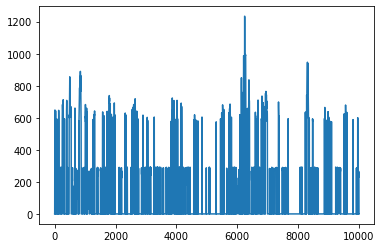

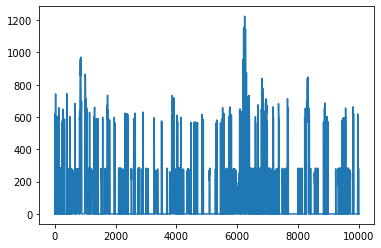

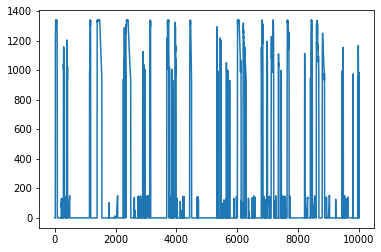

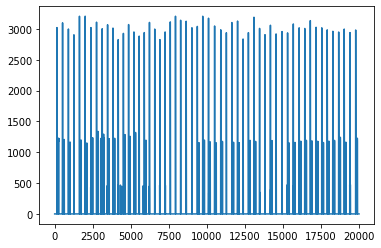

In [ ]:
# Plotting the abnormality above mean
def give_ab_above_mean(seg1):
  seg1 = seg1-seg1.min()
  mn = seg1.mean()
  std = seg1.std()
  seg1_mod = [0 if seg > (mn-std) and seg < (mn+std) else seg for seg in seg1]
  seg1_mod = np.asarray(seg1_mod, dtype = 'float64')
  seg1_mod = seg1_mod - seg1_mod.mean()
  seg1_mod = [0 if seg < 0 else seg for seg in seg1_mod]
  plt.plot(seg1_mod)
  plt.show()
  return seg1_mod

sgm_0 = give_ab_above_mean(data)
sgm_1 = give_ab_above_mean(data1)
sgm_2 = give_ab_above_mean(data2)
sgm_3 = give_ab_above_mean(data3)

In [ ]:
# Comparing the three channels based on features of abnormality
# How to do this?
